# Plot scan

In [1]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from itertools import product
import seaborn as sns
import sys
sys.path.append('../')
pd.option_context('display.max_columns', -1)

pd.options.mode.chained_assignment = None #Disable copy warnings
# plt.style.use('fivethirtyeight') #Set style
# mpl.rcParams.update({'figure.figsize' : (15,10)})  #Set general plotting options
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({"savefig.dpi" : 300}) #Figure resolution


#Define plotting style:
sns.set_style('ticks',{'font.family':'Times New Roman', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
cm = plt.colormaps['RdYlBu']

In [2]:
#Load scan data
pclFile = './hs_test_highMC/Events/run_01/hs_16_tau_3.00e-03_atlas_2018_13.pcl'
pclFile = './hs_combined.pcl'
dataDF = pd.read_pickle(pclFile)
# Round lifetimes
dataDF['tau_ns'] = dataDF['tau_ns'].apply(lambda x: round(x, 3 - int(np.floor(np.log10(abs(x))))))
# print(dataDF.columns.values.tolist()) #Print all columns names

In [3]:
dataDF.T

,0,1,2,3,4,5,6,7,8,9,10,11
Luminosity (1/fb),139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0
SR,HighPT,Trackless,HighPT,Trackless,HighPT,Trackless,HighPT,Trackless,HighPT,Trackless,HighPT,Trackless
$N_s$,0.04983,0.9975,0.05344,0.6388,0.01724,0.2018,0.1247,1.204,0.04585,0.9117,0.0,0.2393
$N_s$ Err,0.03633,0.1599,0.0402,0.1163,0.01724,0.06019,0.06266,0.201,0.03279,0.1787,0.0,0.08542
AccEff,0.0,0.000002,0.0,0.000001,0.0,0.0,0.0,0.000002,0.0,0.000002,0.0,0.0
AccEffErr,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Total,"(487100.0, 1.0)","(487100.0, 1.0)","(487000.0, 1.0)","(487000.0, 1.0)","(487000.0, 1.0)","(487000.0, 1.0)","(487100.0, 1.0)","(487100.0, 1.0)","(487100.0, 1.0)","(487100.0, 1.0)","(487100.0, 1.0)","(487100.0, 1.0)"
Total Error,"(444.6, 0.0)","(444.6, 0.0)","(444.6, 0.0)","(444.6, 0.0)","(444.6, 0.0)","(444.6, 0.0)","(444.6, 0.0)","(444.6, 0.0)","(444.7, 0.0)","(444.7, 0.0)","(444.6, 0.0)","(444.6, 0.0)"
Jet selection,"(19.89, 4.084e-05)","(457.9, 0.00094)","(13.8, 2.833e-05)","(453.3, 0.0009308)","(22.73, 4.667e-05)","(455.8, 0.0009358)","(17.45, 3.584e-05)","(438.8, 0.0009008)","(21.51, 4.416e-05)","(428.6, 0.00088)","(19.48, 4e-05)","(439.2, 0.0009017)"
Jet selection Error,"(2.842, 5.834e-06)","(13.63, 2.799e-05)","(2.366, 4.859e-06)","(13.56, 2.785e-05)","(3.037, 6.236e-06)","(13.6, 2.793e-05)","(2.662, 5.465e-06)","(13.35, 2.74e-05)","(2.955, 6.066e-06)","(13.19, 2.708e-05)","(2.812, 5.773e-06)","(13.35, 2.741e-05)"


### Compute UL on BR assuming SM higgs production cross-section

In [4]:
xsecHiggs = 48.5
dataDF['BR_UL'] = 1.0/(dataDF['robs']*(xsecHiggs/(dataDF['Total xsec (pb)']*dataDF['BR25_35_35'])))

### Define colors and plotting order

In [5]:
colors = sns.color_palette("Paired",10)
colorsPink = sns.color_palette("colorblind",8)
colorDict = {'HighPT' : colorsPink[4], #light pink
             'Trackless' : colors[4] }
srs = {'HighPT' : dataDF[(dataDF['SR'] == 'HighPT')], 'Trackless' : dataDF[(dataDF['SR'] == 'Trackless')]}


### Results from 2406.16281

In [6]:
x0 = [0.12104326285325616, 0.17129384305274148, 0.2666939692487638, 0.42989733239550776, 0.6751592476254904, 0.9892076462503142, 1.6224789700225655, 2.803437366543819, 4.843983320181237, 8.44276009241119, 12.586522291021959, 19.5964404149491, 28.961994298964978, 50.478945426012146]
y0 = [0.7818613967155071, 0.4898649152865401, 0.271386216414316, 0.1659003599273301, 0.12655813792388443, 0.10141609175168781, 0.10653220497636114, 0.11755172530281288, 0.15034854744924336, 0.19229565250418726, 0.25207322489283274, 0.3557501060068492, 0.502068944362059, 0.975692523481958]
xy0 = np.array(list(zip(x0,y0)))

### Plot excluded points grouped by most excluding analysis

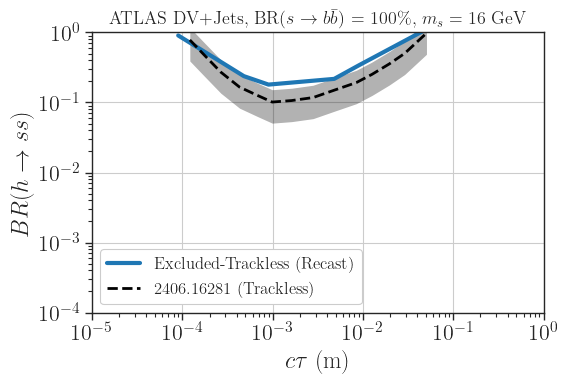

In [7]:

plt.figure(figsize=(6,4))
n = 0
for sr,data in srs.items():
    if 'HighPT' in sr: continue
    x = np.array(data['tau_ns']*3e8*1e-9)
    y = np.array(data['BR_UL'])
    y = y[np.argsort(x)]
    x = x[np.argsort(x)]
    color = colorDict[sr]
    # plt.scatter(x,y,color=color,label=sr,s=50)
    plt.plot(x,y,label='Excluded-%s (Recast)' %sr,linewidth=3.0)

plt.plot(xy0[:,0]/1e3,xy0[:,1],linewidth=2,linestyle='dashed',label='2406.16281 (Trackless)',color='black')
plt.fill_between(xy0[:,0]/1e3,xy0[:,1]*0.5,xy0[:,1]*1.5,linewidth=0,alpha=0.3,color='black')

lgd = plt.legend(framealpha=1.0,fontsize=12)
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$c \tau$ (m)')
plt.ylabel(r'$BR(h \to s s)$')
plt.tight_layout()
plt.xlim(1e-5,1)
plt.ylim(1e-4,1)
# plt.ylim(1e-2,1)
plt.grid()
plt.tight_layout()
plt.title(r'ATLAS DV+Jets, BR($s \to b\bar{b}$) = 100\%, $m_{s} = 16$ GeV', fontsize=13)
plt.savefig('recastHS.png')
plt.show()